<a href="https://colab.research.google.com/github/Namyalg/Projects_in_python/blob/master/Sobel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

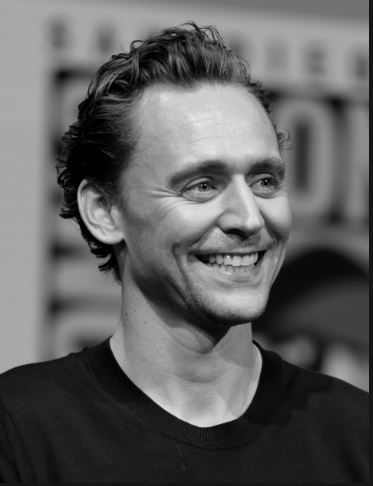

(486, 373)


In [57]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow


#Image is converted to grayscale
img = cv2.imread('/content/tom.JPG',0)
#img = cv2.resize(img, (300, 360))
cv2_imshow(img)
print(img.shape)

In [58]:
#The kernel used for creating a blur effect
#
#works fine for this

height = img.shape[0]
width = img.shape[1]
print(height, width)

#360 by width
#300 by height

486 373


In [59]:
pixels = []
kernel = np.array([0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11,0.11]).reshape(3,3)
#pixels are extracted from the image converted to grayscale
for i in range(height):
  for j in range(width):
    pixels.append(img[i,j])

#The pixels array is resized in accordance with the size of the image
pixels = np.array(pixels).reshape(height,width)

#To handle the edge cases, sentinel values are used
#The pixels array is bound by zeros on all edges

          # 00000000
          # 0PIXELS0
          # 00000000
#This is done to ensure that the kernel is applied to all the pixels
#Sentinel values to ensure the edges arent missed out

#Along the rows and columns
pixels = np.insert(pixels , [0,height] , np.zeros(len(pixels[0])) , axis = 0)
pixels = np.insert(pixels , [0, width] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1)

#Convolution is applied here
blur = []
for i in range(1,height):
  for j in range(1,width):
    temp = pixels[i:i+3 , j:j+3]
    product = np.multiply(temp,kernel)
    blur.append(sum(sum(product)))

blur = np.array(blur).reshape(height-1,width-1)

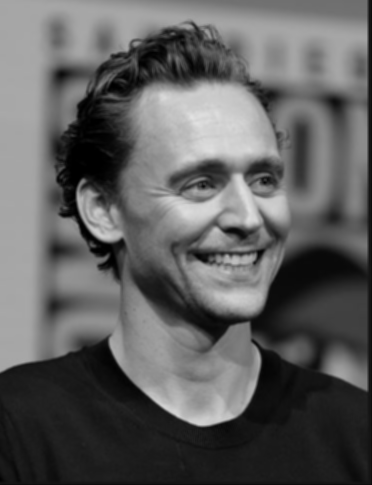

In [60]:
cv2_imshow(blur)

In [61]:
pixels = []
kernel = np.array([-1,-2,-1,0,0,0,1,2,1]).reshape(3,3)
#pixels are extracted from the image converted to grayscale
for i in range(height-1):
  for j in range(width-1):
    pixels.append(blur[i,j])

#The pixels array is resized in accordance with the size of the image
pixels = np.array(pixels).reshape(height-1,width-1)

#To handle the edge cases, sentinel values are used
#The pixels array is bound by zeros on all edges

          # 00000000
          # 0PIXELS0
          # 00000000
#This is done to ensure that the kernel is applied to all the pixels
#Sentinel values to ensure the edges arent missed out

#Along the rows and columns
pixels = np.insert(pixels , [0,height-1] , np.zeros(len(pixels[0])) , axis = 0)
pixels = np.insert(pixels , [0, width-1] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1)

#Convolution is applied here
convoluted_Y = []
for i in range(1,height-1):
  for j in range(1,width-1):
    temp = pixels[i:i+3 , j:j+3]
    product = np.multiply(temp,kernel)
    convoluted_Y.append(sum(sum(product)))

convoluted_Y = np.array(convoluted_Y).reshape(height-2,width-2)

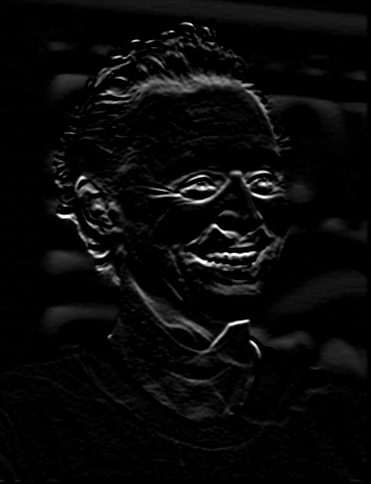

In [62]:
cv2_imshow(convoluted_Y)

In [63]:
pixels = []
kernel = kernel.transpose()
#pixels are extracted from the image converted to grayscale
for i in range(height-1):
  for j in range(width-1):
    pixels.append(img[i,j])

#The pixels array is resized in accordance with the size of the image
pixels = np.array(pixels).reshape(height-1,width-1)

#To handle the edge cases, sentinel values are used
#The pixels array is bound by zeros on all edges

          # 00000000
          # 0PIXELS0
          # 00000000
#This is done to ensure that the kernel is applied to all the pixels
#Sentinel values to ensure the edges arent missed out

#Along the rows and columns
pixels = np.insert(pixels , [0,height-1] , np.zeros(len(pixels[0])) , axis = 0)
pixels = np.insert(pixels , [0, width-1] , np.zeros((len(pixels[:, 0]) ,1)) , axis = 1)

#Convolution is applied here
convoluted_X = []
for i in range(1,height-1):
  for j in range(1,width-1):
    temp = pixels[i:i+3 , j:j+3]
    product = np.multiply(temp,kernel)
    convoluted_X.append(sum(sum(product)))

convoluted_X = np.array(convoluted_X).reshape(height-2,width-2)

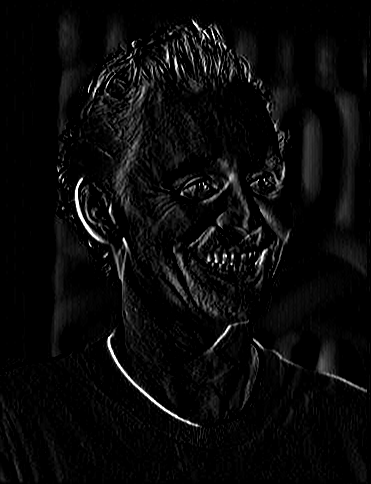

In [64]:

cv2_imshow(convoluted_X)

In [65]:
print(convoluted_X.shape)

(484, 371)


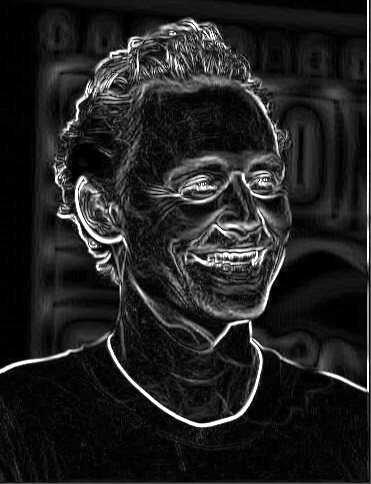

In [66]:
from math import sqrt, atan
sobel1 = []
arc = []
for i in range(height-2):
  for j in range(width-2):
    in_x = pow(convoluted_X[i,j] ,2)
    in_y = pow(convoluted_Y[i,j] , 2)
    gr_X = convoluted_X[i,j]
    gr_Y = convoluted_Y[i,j]
    grad = sqrt(in_x + in_y)
    sobel1.append(grad)


sobel1 = np.array(sobel1).reshape(height-2, width-2)
cv2_imshow(sobel1)

In [67]:
print(sobel1.shape)

(484, 371)


In [68]:
print(convoluted_X.shape)

(484, 371)


In [69]:
height_con = convoluted_X.shape[0]
width_con = convoluted_X.shape[1]

In [32]:

convoluted_X = np.insert(convoluted_X , [0,height_con-1] , np.zeros(len(convoluted_X[0])) , axis = 0)
convoluted_X = np.insert(convoluted_X , [0, width_con-1] , np.zeros((len(convoluted_X[:, 0]) ,1)) , axis = 1)

In [33]:

convoluted_Y = np.insert(convoluted_Y , [0,height_con-1] , np.zeros(len(convoluted_Y[0])) , axis = 0)
convoluted_Y = np.insert(convoluted_Y , [0, width_con-1] , np.zeros((len(convoluted_Y[:, 0]) ,1)) , axis = 1)

In [36]:
sobel1 = np.insert(sobel1 , [0,sobel1.shape[0]-1] , np.zeros(len(sobel1[0])) , axis = 0)
sobel1 = np.insert(sobel1 , [0, sobel1.shape[1]-1] , np.zeros((len(sobel1[:, 0]) ,1)) , axis = 1)

In [37]:
print(sobel1.shape)

(486, 373)


In [34]:
print(convoluted_X.shape)

(486, 373)


In [74]:
value = 0
non_li = []
from math import atan, degrees
for i in range(1 , height-3):
  for j in range(1, width-3):
    grx = convoluted_X[i, j]
    gry = convoluted_Y[i, j]
    sob = sobel1[i, j]
    if gry == 0:
      if sob >= sobel1[i, j+1] and sob >= sobel1[i, j-1]:
        value = sob
      else:
        value = 0
    elif grx == 0:
      if sob >= sobel1[i+1, j] and sob >= sobel1[i-1, j]:
        value = sob
      else:
        value = 0
    else:
      angle = degrees(atan(gry/grx))
      if grx > 0 and gry > 0:
        gr = angle
      elif grx < 0 and gry < 0:
        gr = 180 + angle
      elif grx > 0 and gry < 0:
        gr = 360 + angle
      else:
        gr = 180 + angle
      p1 = [*range(0,22)]
      p2 = [*range(22,67)]
      p3 = [*range(67,112)]
      p4 = [*range(112,157)]
      p5 = [*range(157,202)]
      p6 = [*range(202,247)] 
      p7 = [*range(247,290)]
      p8 = [*range(290,337)]          
      p9 = [*range(337,360)]
      gr = int(gr)
      if gr in p1 or gr in p5 or gr in p9:
        if sob >= sobel1[i, j+1] and sob >= sobel1[i, j-1]:
          value = sob
        else:
            value = 0
      elif gr in p2 or gr in p6:
        if sob >= sobel1[i-1, j+1] and sob >= sobel1[i+1, j-1]:
          value = sob
        else:
            value = 0
      elif gr in p3 or gr in p7:
        if sob >= sobel1[i-1, j] and sob >= sobel1[i+1, j]:
          value = sob
        else:
            value = 0
      elif gr in p4 or gr in p8:
        if sob >= sobel1[i-1, j-1] and sob >= sobel1[i+1, j + 1]:
          value = sob
        else:
            value = 0
    non_li.append(value)

non_li = np.array(non_li).reshape(height-4, width-4)
print(non_li.shape)
    

(482, 369)


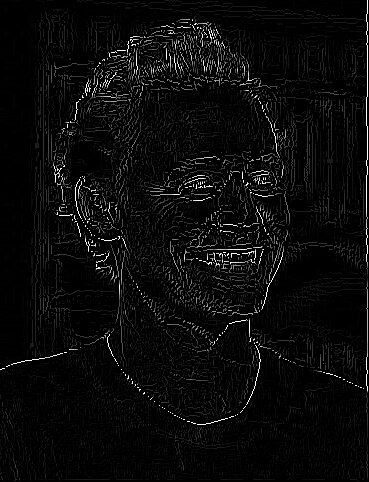

In [75]:
cv2_imshow(non_li)

In [40]:
202+45+45+45


337

In [ ]:

x = -1
y = 1

if x == 0:
  #compare sides
elif y == 0:
  #compare top and bottom
else:
  
print(gr)


135.0


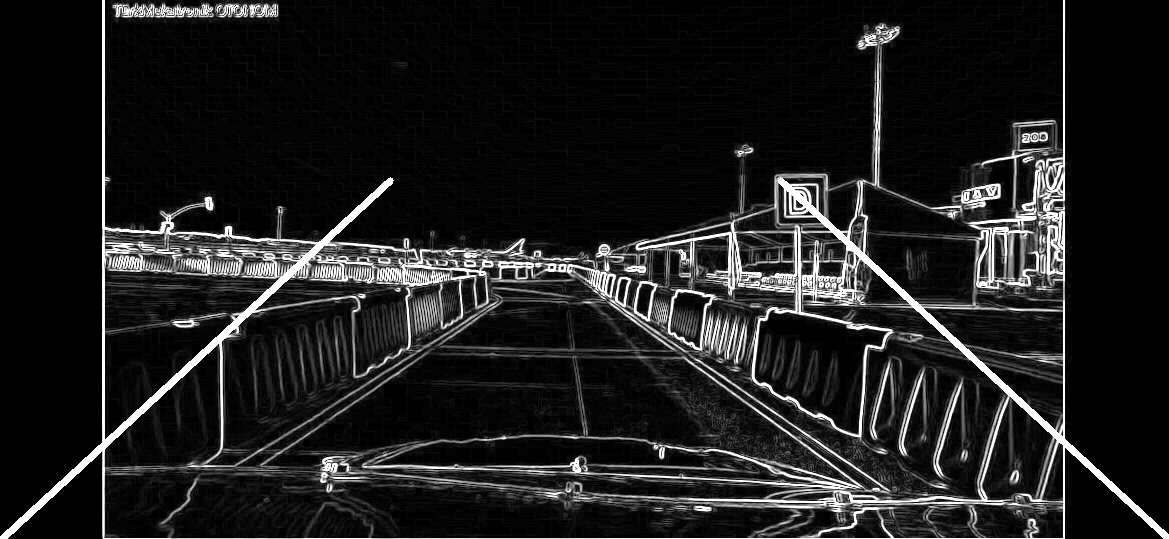

In [ ]:
thickness = 6
top_left = ((width//3), height//3) 
bottom_left = (0,height)   
top_right = ((width*2)//3 , height//3)
bottom_right = (width, height)
cv2.line(sobel1, top_right, bottom_right, (255,255,0), thickness)
cv2.line(sobel1, top_left, bottom_left, (255,255,0), thickness)
cv2_imshow(sobel1) 

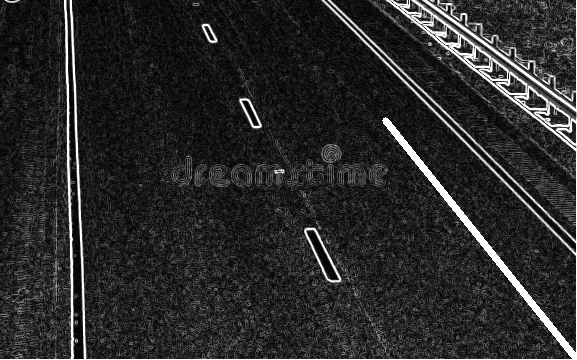

In [ ]:
cv2_imshow(sobel)